# Задача 3 Многоклассовая классификация и множественная классификация/регрессия
Фомина Виктория Викторовна, 22.М07

# Задача

- [+] Изучите [возможности sklearn](https://scikit-learn.org/stable/modules/multiclass.html#multiclass-classification) для решения задач **Multiclass classification**, **Multilabel classification** и **Multioutput Regression**. Основные компоненты библиотеки указаны на рисунке ниже.
![multi_org_chart](https://scikit-learn.org/stable/_images/multi_org_chart.png)

- [+] Найдите данные, на которых можно решить задачу **Multiclass classification** (классификация с более чем двумя классами). В крайнем случае преобразуйте данные, предназначенные для другой задачи.
- [+] Выполнить разведочный анализ (**EDA**), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи.
- [+] При необходимости выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные), убрать ненужные признаки, создать новые (**Feature Engineering**).
- [+] Используя стратегии **OneVsRest**, **OneVsOne** и **OutputCode** решите задачу **Multiclass classification** для каждого из пройденных базового алгоритма классификации (**logistic regression, svm, knn, naive bayes, decision tree**). При обучении использовать **подбор гиперпараметров**, **кросс-валидацию** и при необходимости **масштабирование данных**, добиться наилучшего качества предсказания.
- [+] Замерить время обучения каждой модели для каждой стратегии.
- [+] Для оценки качества моделей используйте метрику **AUC-ROC**.
- [+] Сравнить время обучения и качество всех моделей и всех стратегий. Сделать выводы.
- [+] (**+3 балла**) Повторить все пункты для задачи **Multilabel classification** (классификация с несколькими целевыми признаками, например, бинарными). В качестве стратегий попробовать **MultiOutputClassifier** и **ClassifierChain**.
- [+] (**+2 балла**) Повторить все пункты для задачи **Multioutput Regression** (регрессия с несколькими целевыми признаками, вещественными). Модель попробовать как минимум одну: **Ridge**. В качестве стратегий попробовать **MultiOutputRegressor** и **RegressorChain**. В качестве метрики использовать **R2**.

## Multiclass classification

### Data

The task uses a dataset that contains information about the physical capabilities of people of different ages.

Dataset Description:

- age
- gender
- height_cm - height in centimeters
- weight_kg - weight in kilograms
- body fat_% - fat percentage
- diastolic - minimum value of diastolic blood pressure
- systolic - minimum value of systolic blood pressure
- gripForce
- sit and bend forward_cm - maximum forward bend in centimeters
- sit-ups counts - number of squats
- broad jump_cm - long jump in centimeters
- class (A - best)

The target feature is **class**.

In [335]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# set floating point precision
%precision %.4f

'%.4f'

In [336]:
# Reading the training sample:
df = pd.read_csv('Dataset/body_performance.csv')
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [337]:
# Total number of missing values:
df.isnull().sum()

age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64

### Разведочный анализ

In [338]:
# Consider how many values the target feature takes:
df['class'].value_counts()

C    3349
D    3349
A    3348
B    3347
Name: class, dtype: int64

Построим график:

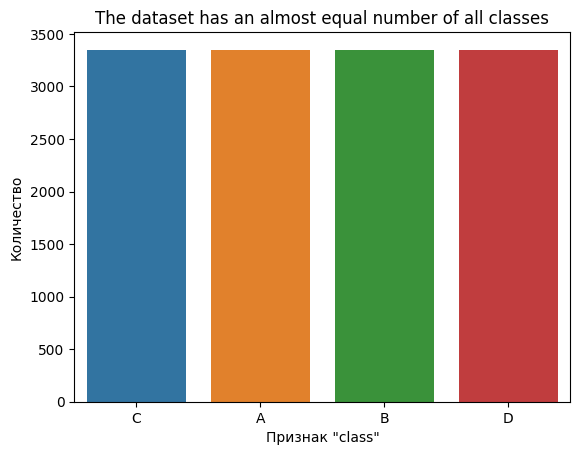

In [339]:
# Let's build a graph:
sns.countplot(x="class", data=df)
plt.xlabel('Признак "class"')
plt.ylabel("Количество")
plt.title("The dataset has an almost equal number of all classes")
plt.show()

In [340]:
# Characteristic values **age**
df['age'].describe()

count    13393.000000
mean        36.775106
std         13.625639
min         21.000000
25%         25.000000
50%         32.000000
75%         48.000000
max         64.000000
Name: age, dtype: float64

In [341]:
# Let's introduce an additional function for convenient display of graphs:
def show_class_crosstab(x_param, x_param_name="", figsize_number=20):
    pd.crosstab(df[x_param], df['class']).plot(kind="bar", figsize=(figsize_number, 6))
    plt.xlabel(x_param_name)
    plt.ylabel('Quantity per class')
    plt.show()

def show_barplot(x_param_name):
    plt.figure(figsize=(20, 5))
    plt.grid(axis="x")
    plt.xticks(rotation=90)
    plt.title('Belonging to a class relative to a parameter' + x_param_name, fontsize=20)
    plt.xlabel(x_param_name, fontsize= 15)
    plt.ylabel('class', fontsize= 15)
    sns.barplot(x = df[x_param_name], y = df['class'])
    plt.show()

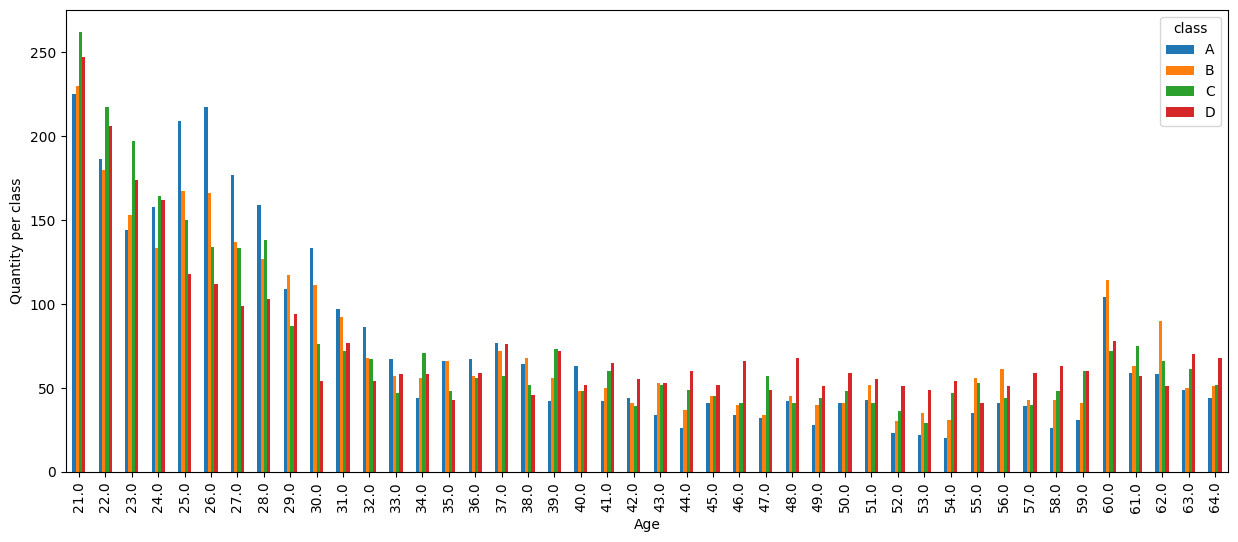

In [342]:
show_class_crosstab('age', 'Age', 15)

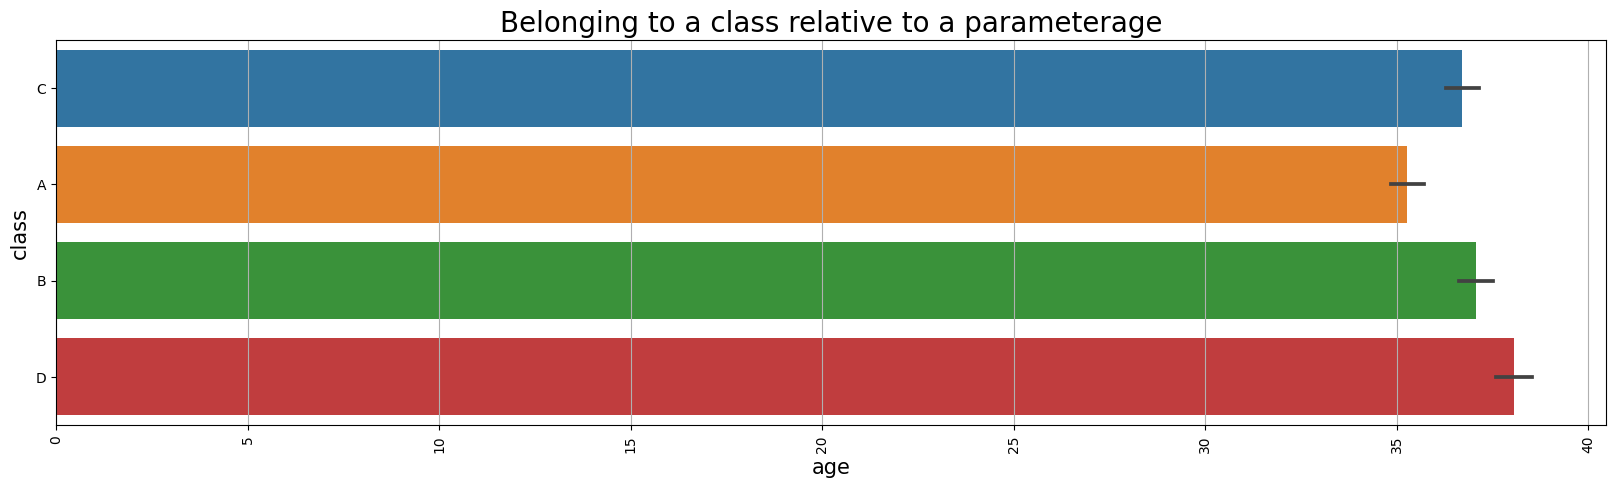

In [343]:
show_barplot('age')

- Early ages are dominated by A and C classes
- In the elderly - classes B and D
- With increasing age, we see a trend of transition from classes A and B to classes C and D

In [344]:
# The average age of people in different classes:
df.groupby('class')['age'].mean()

class
A    35.268220
B    37.074096
C    36.699612
D    38.058226
Name: age, dtype: float64

- In class A, the average age is lower than in other classes and is 35 years old
- In grades B and C, the average age is 37
- In class D - 38

In [345]:
# Discrete attribute values **gender**
df['gender'].describe()

count     13393
unique        2
top           M
freq       8467
Name: gender, dtype: object

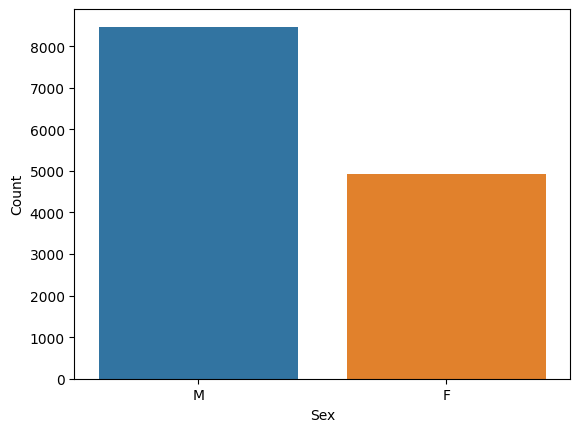

In [346]:
# Let's build a graph:
sns.countplot(x="gender", data=df)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

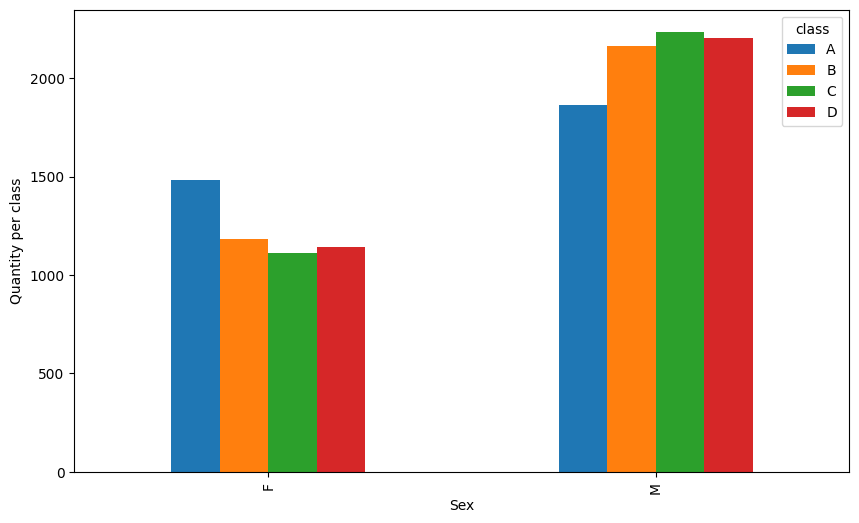

In [347]:
# Let's build a graph of belonging to a class relative to gender:
show_class_crosstab('gender', 'Sex', 10)

- The attribute takes two values: F (female) and M (male)
- Class A predominates among women
- Among men - class C

In [348]:
# Let's see how many people of different sexes belong to each class on average:
df.groupby('class')['gender'].value_counts()

class  gender
A      M         1864
       F         1484
B      M         2162
       F         1185
C      M         2237
       F         1112
D      M         2204
       F         1145
Name: gender, dtype: int64

In [349]:
# Values of the feature height_cm
df['height_cm'].describe()

count    13393.000000
mean       168.559807
std          8.426583
min        125.000000
25%        162.400000
50%        169.200000
75%        174.800000
max        193.800000
Name: height_cm, dtype: float64

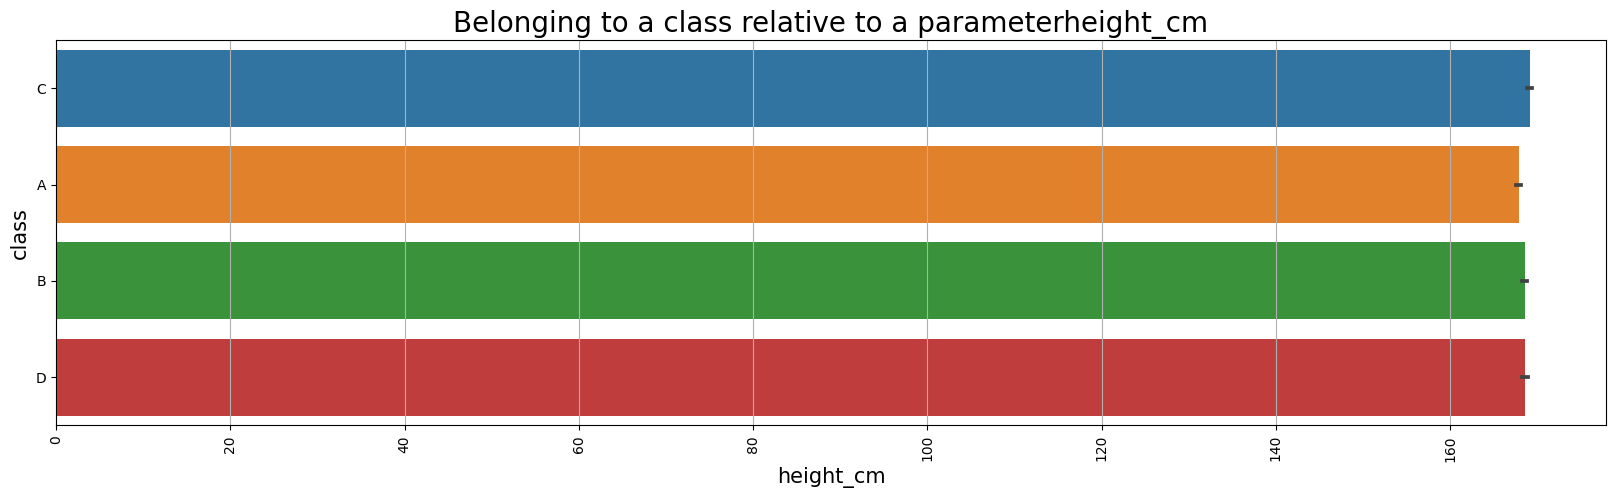

In [350]:
# Let's build a graph of belonging to a class with respect to height:
show_barplot('height_cm')

- Smaller people dominate class A
- With big - in class C

In [351]:
# Feature values weight_kg
df['weight_kg'].describe()

count    13393.000000
mean        67.447316
std         11.949666
min         26.300000
25%         58.200000
50%         67.400000
75%         75.300000
max        138.100000
Name: weight_kg, dtype: float64

In [352]:
# Let's find out the average growth values in each class:
df.groupby('class')['height_cm'].mean()

class
A    167.871027
B    168.580311
C    169.162168
D    168.625530
Name: height_cm, dtype: float64

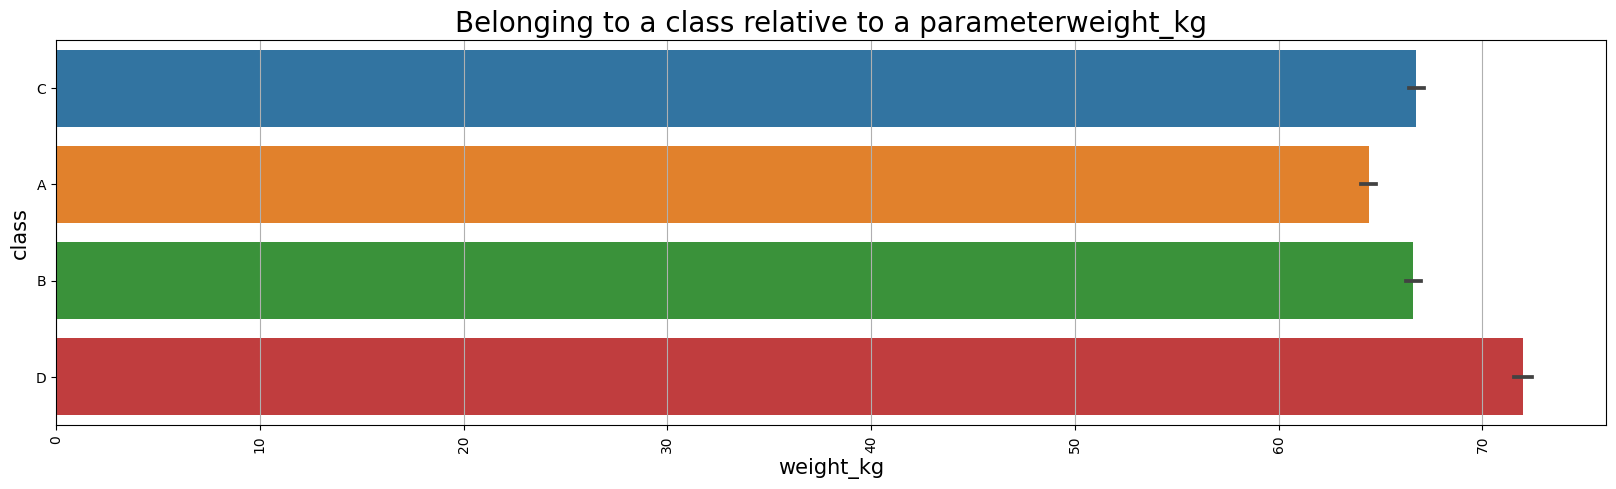

In [353]:
# Let's build a graph of belonging to a class relative to weight:
show_barplot('weight_kg')

In [354]:
# Sign of body fat_%
df['body fat_%'].describe()

count    13393.000000
mean        23.240165
std          7.256844
min          3.000000
25%         18.000000
50%         22.800000
75%         28.000000
max         78.400000
Name: body fat_%, dtype: float64

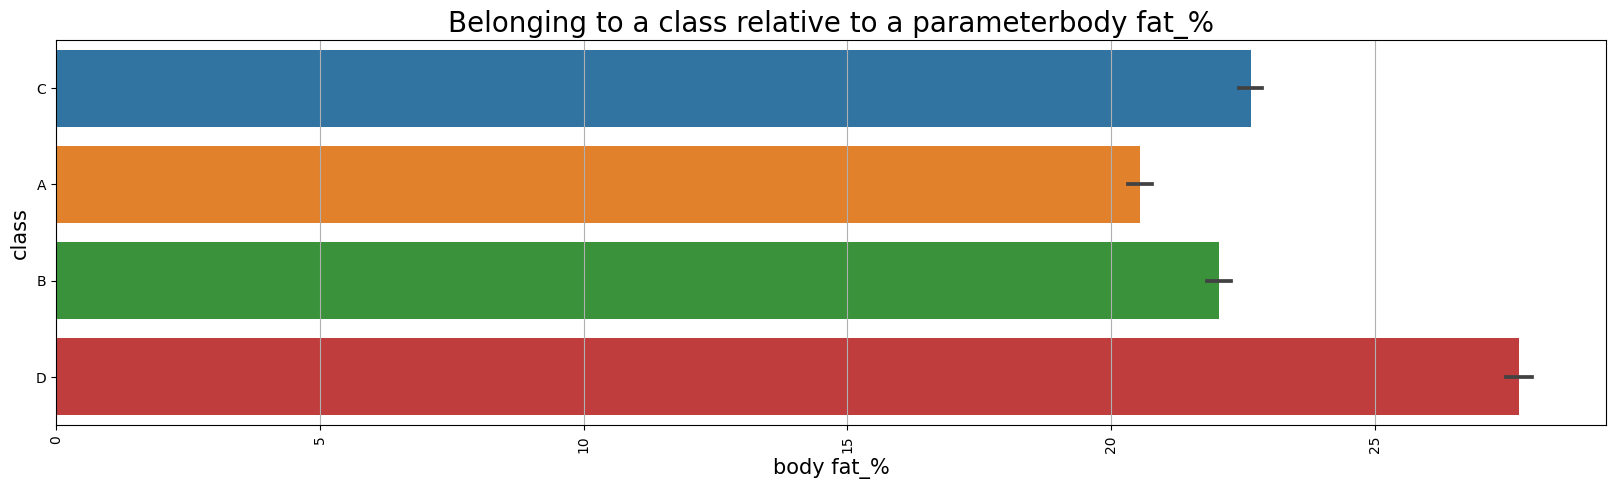

In [355]:
# Let's build a graph of belonging to a class relative to the percentage of fat:
show_barplot('body fat_%')

- The fat percentage of people in class A is significantly less than in other classes
- The largest percentage of fat - in class D
- With an increase in the percentage of fat, the sports class worsens

In [356]:
# Let's find out the average values of the percentage of fat in each class:
df.groupby('class')['body fat_%'].mean()

class
A    20.539159
B    22.039981
C    22.644564
D    27.735432
Name: body fat_%, dtype: float64

In [357]:
# Sign of diastolic
df['diastolic'].describe()

count    13393.000000
mean        78.796842
std         10.742033
min          0.000000
25%         71.000000
50%         79.000000
75%         86.000000
max        156.200000
Name: diastolic, dtype: float64

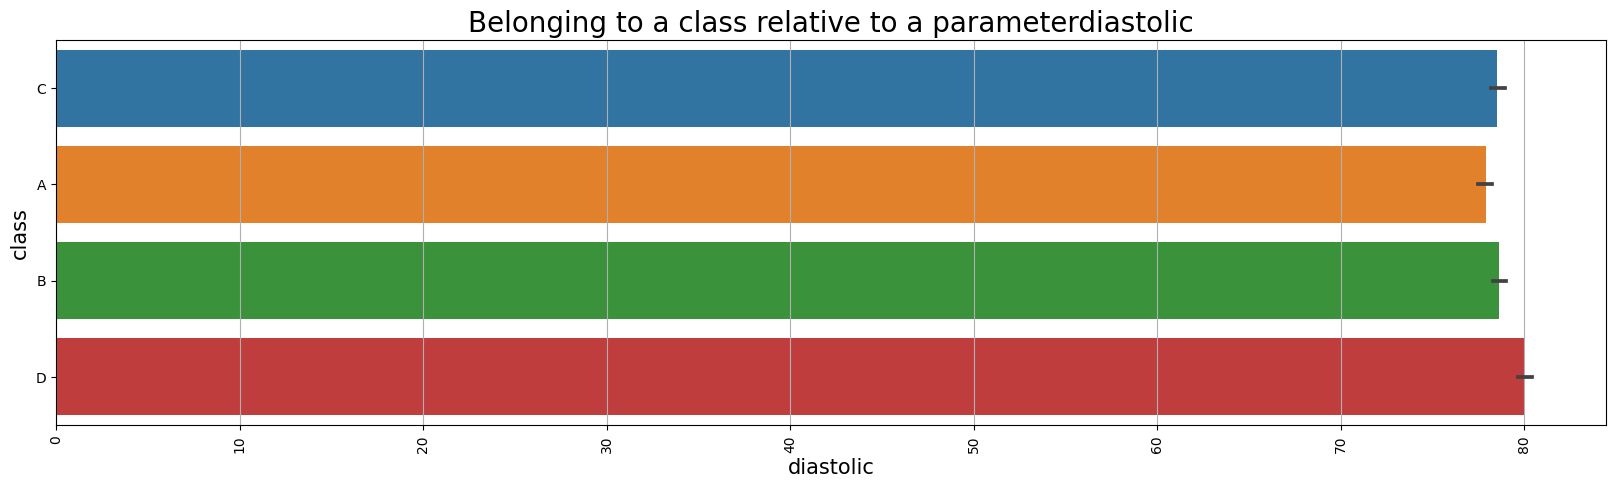

In [359]:
# Let's build a class membership graph with respect to the minimum diastolic blood pressure:
show_barplot('diastolic')

- Minimum distoll blood pressure is lowest in class A
- In class D, it has the highest value
- There is a trend of worsening class with increasing minimum distoll blood pressure

In [ ]:
# Find out the average value of the minimum distoll blood pressure in each class:
df.groupby('class')['diastolic'].mean()

class
A    77.903345
B    78.656468
C    78.550672
D    80.076530
Name: diastolic, dtype: float64

In [ ]:
# Sign of systolic
df['systolic'].describe()

count    13393.000000
mean       130.234817
std         14.713954
min          0.000000
25%        120.000000
50%        130.000000
75%        141.000000
max        201.000000
Name: systolic, dtype: float64

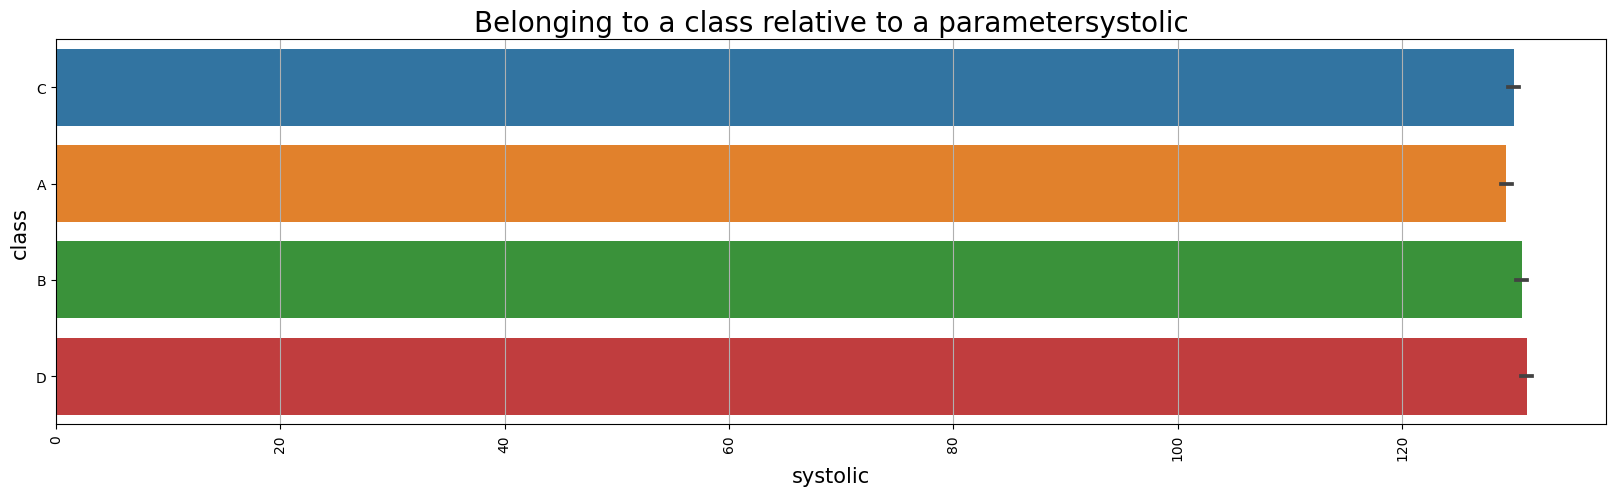

In [ ]:
# Let's build a graph of class membership relative to the minimum systolic blood pressure:
show_barplot('systolic')

- Minimum distoll blood pressure is lowest in class A
- In class D, it has the highest value
- There is a trend of worsening class with increasing minimum systolic blood pressure

In [ ]:
# Find out the average value of the minimum systolic blood pressure in each class:
df.groupby('class')['systolic'].mean()

class
A    129.290024
B    130.639349
C    129.925351
D    131.084503
Name: systolic, dtype: float64

In [ ]:
# Sign of gripForce
df['gripForce'].describe()

count    13393.000000
mean        36.963877
std         10.624864
min          0.000000
25%         27.500000
50%         37.900000
75%         45.200000
max         70.500000
Name: gripForce, dtype: float64

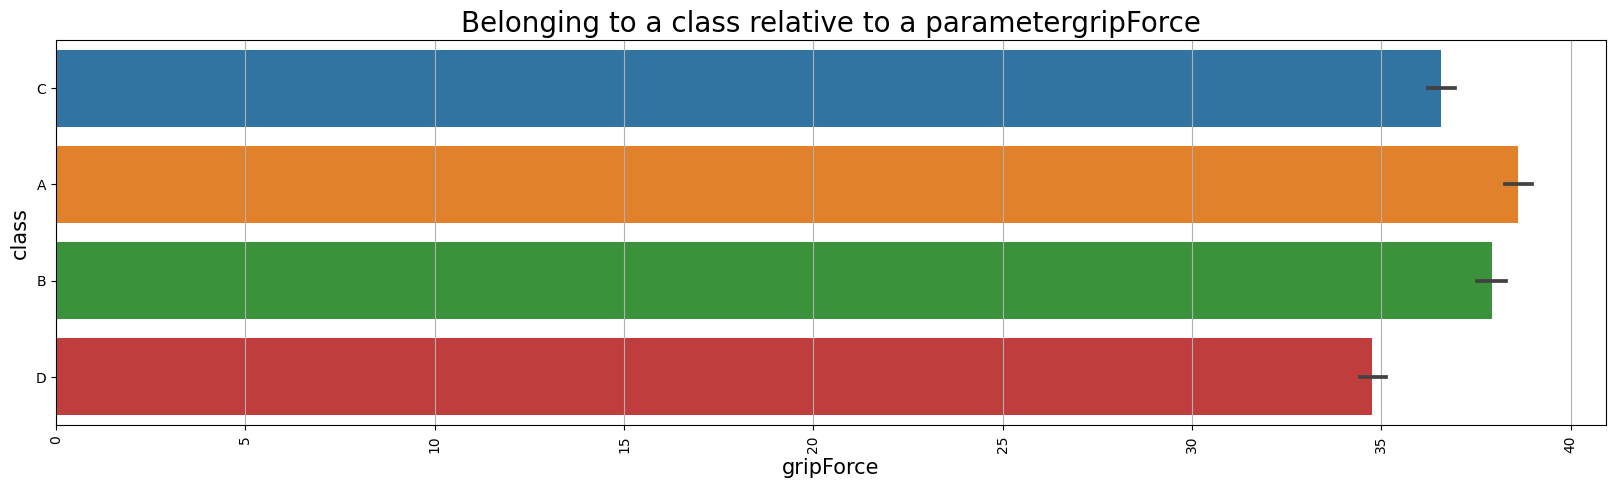

In [ ]:
# Let's build a class membership graph with respect to gripForce:
show_barplot('gripForce')

- GripForce value is lowest in class D
- In class A, it has the highest value
- There is a tendency to improve the class with increasing gripForce

In [ ]:
# Let's find out the average value of gripForce in each class:
df.groupby('class')['gripForce'].mean()

class
A    38.615723
B    37.910436
C    36.582663
D    34.747746
Name: gripForce, dtype: float64

In [ ]:
# Sign of sit and bend forward_cm
df['sit and bend forward_cm'].describe()

count    13393.000000
mean        15.209268
std          8.456677
min        -25.000000
25%         10.900000
50%         16.200000
75%         20.700000
max        213.000000
Name: sit and bend forward_cm, dtype: float64

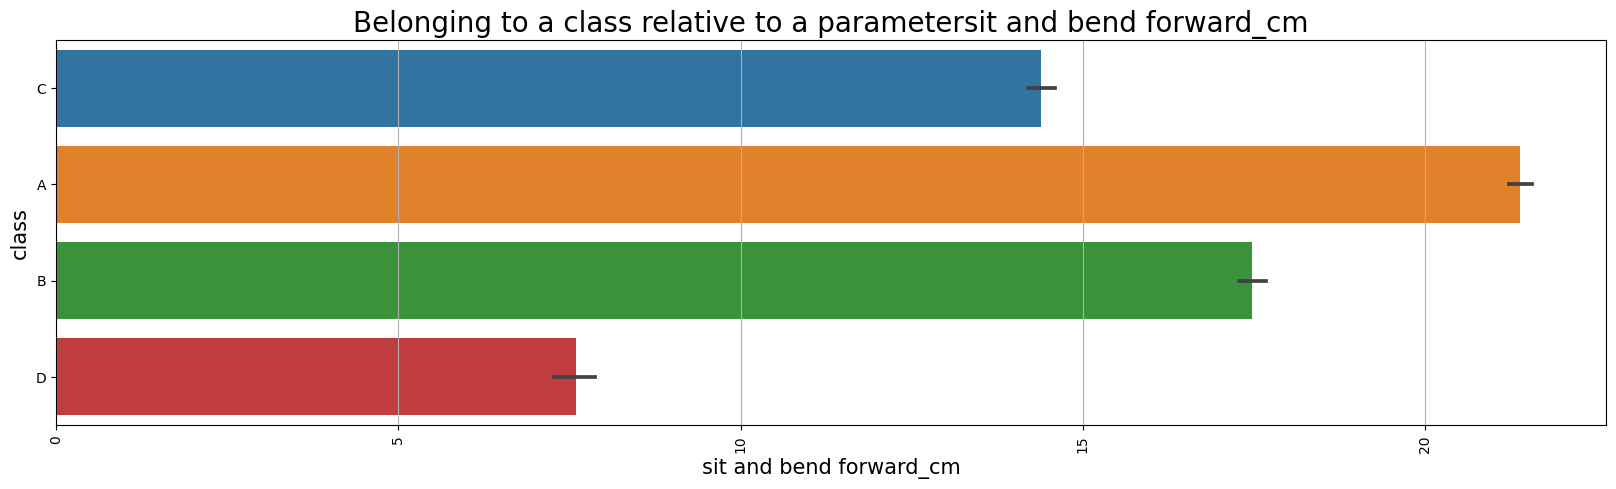

In [ ]:
# Let's build a class membership graph relative to the maximum forward slope:
show_barplot('sit and bend forward_cm')

- The value of the maximum forward tilt is the lowest in class D
- In class A, it has the highest value
- There is a tendency to improve the class with increasing maximum forward lean

In [ ]:
# Let's find out the average value of the maximum forward inclination in each class:
df.groupby('class')['sit and bend forward_cm'].mean()

class
A    21.391777
B    17.467586
C    14.390645
D     7.590260
Name: sit and bend forward_cm, dtype: float64

In [ ]:
# Sign of sit-ups counts
df['sit-ups counts'].describe()

count    13393.000000
mean        39.771224
std         14.276698
min          0.000000
25%         30.000000
50%         41.000000
75%         50.000000
max         80.000000
Name: sit-ups counts, dtype: float64

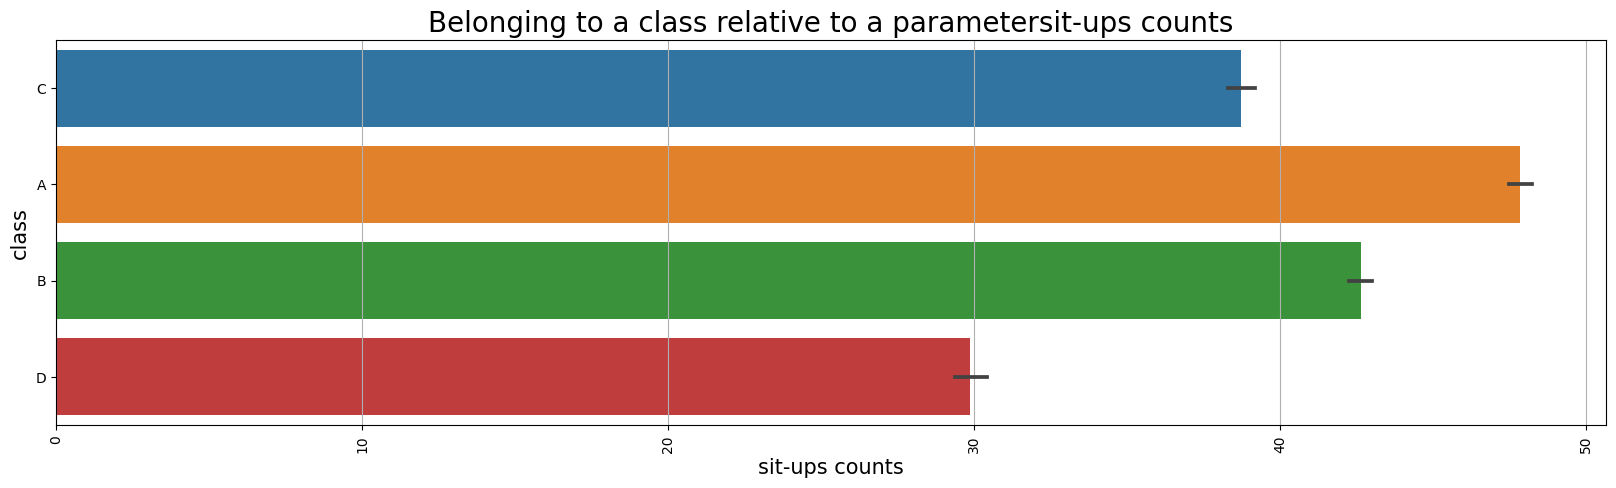

In [ ]:
# Let's build a class membership graph relative to the maximum number of squats:
show_barplot('sit-ups counts')

- The value of the maximum number of squats is the lowest in class D
- In class A, it has the highest value
- There is a tendency to improve the class with an increase in the maximum number of squats

In [ ]:
# Find out the average value of the maximum number of squats in each class:
df.groupby('class')['sit-ups counts'].mean()

class
A    47.848268
B    42.639199
C    38.720215
D    29.881338
Name: sit-ups counts, dtype: float64

In [ ]:
# Sign of broad jump_cm
df['broad jump_cm'].describe()

count    13393.000000
mean       190.129627
std         39.868000
min          0.000000
25%        162.000000
50%        193.000000
75%        221.000000
max        303.000000
Name: broad jump_cm, dtype: float64

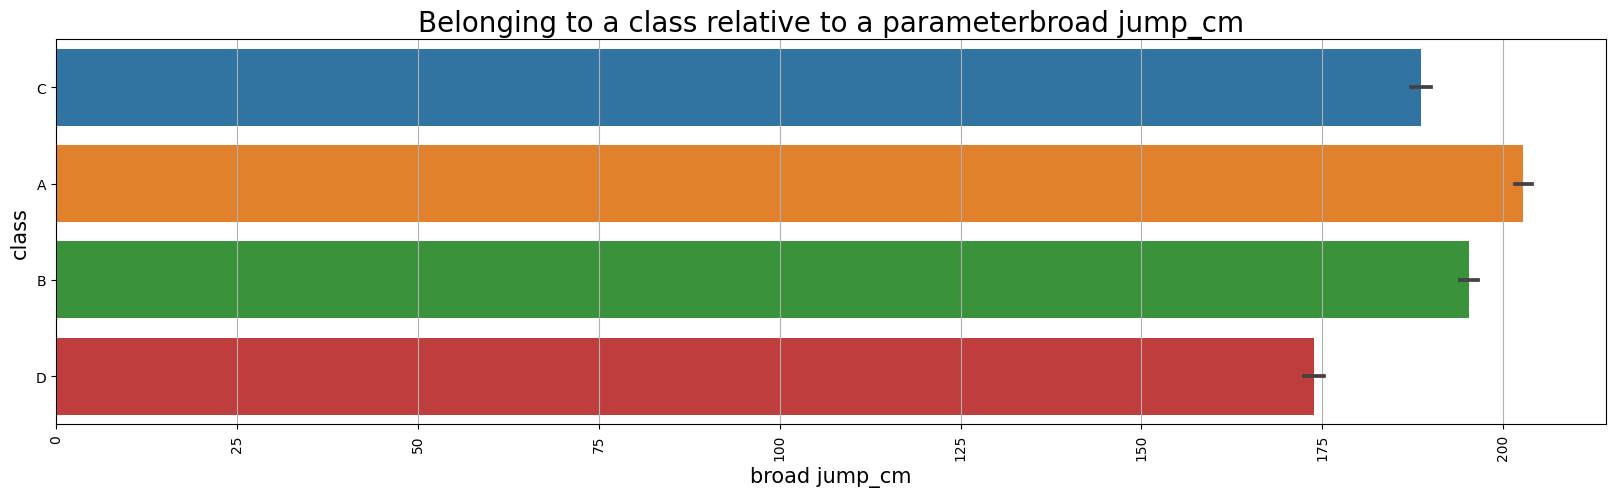

In [ ]:
# Let's build a class membership graph relative to the maximum jump length:
show_barplot('broad jump_cm')

- The value of the maximum jump length is the lowest in class D
- In class A, it has the highest value
- There is a tendency to improve the class with an increase in the maximum length of the jump

In [ ]:
# Let's find out the average value of the maximum jump length in each class:
df.groupby('class')['broad jump_cm'].mean()

class
A    202.744026
B    195.332566
C    188.627949
D    173.820842
Name: broad jump_cm, dtype: float64

### Feature Engineering
Let's find out the average value of the maximum jump length in each class:

In [ ]:
# New attribute of the age category
df['age_category'] = pd.qcut(df['age'], 4)
df.groupby(['age_category', 'class'])['class'].count().to_frame()

class
age_category   class       
(20.999, 25.0] A        922
               B        863
               C        990
               D        907
(25.0, 32.0]   A        978
               B        818
               C        707
               D        593
(32.0, 48.0]   A        785
               B        825
               C        836
               D        932
(48.0, 64.0]   A        663
               B        841
               C        816
               D        917

In [ ]:
df['age_category'] = 0
df.loc[df['age'] <= 25.0, 'age_category'] = 0
df.loc[(df['age'] > 25.0) & (df['age'] <= 32.0), 'age_category'] = 1
df.loc[(df['age'] > 32.0) & (df['age'] <= 48.0), 'age_category'] = 2
df.loc[df['age'] > 48.0, 'age_category'] = 3

In [ ]:
# New category feature height_cm
df['height_category'] = pd.qcut(df['height_cm'], 4)
df.groupby(['height_category', 'class'])['class'].count().to_frame()

class
height_category  class       
(124.999, 162.4] A        908
                 B        795
                 C        775
                 D        887
(162.4, 169.2]   A        976
                 B        879
                 C        776
                 D        722
(169.2, 174.8]   A        765
                 B        893
                 C        885
                 D        825
(174.8, 193.8]   A        699
                 B        780
                 C        913
                 D        915

In [ ]:
df['height_category'] = 0
df.loc[df['height_cm'] <= 162.4, 'height_category'] = 0
df.loc[(df['height_cm'] > 162.4) & (df['height_cm'] <= 169.2), 'height_category'] = 1
df.loc[(df['height_cm'] > 169.2) & (df['height_cm'] <= 174.8), 'height_category'] = 2
df.loc[df['height_cm'] > 174.8, 'height_category'] = 3

In [ ]:
# New category attribute weight_kg
df['weight_category'] = pd.qcut(df['weight_kg'], 4)
df.groupby(['weight_category', 'class'])['class'].count().to_frame()

class
weight_category class       
(26.299, 58.2]  A       1113
                B        838
                C        831
                D        598
(58.2, 67.4]    A        874
                B        873
                C        866
                D        705
(67.4, 75.3]    A        813
                B        926
                C        890
                D        720
(75.3, 138.1]   A        548
                B        710
                C        762
                D       1326

In [ ]:
df['weight_category'] = 0
df.loc[df['weight_kg'] <= 162.4, 'weight_category'] = 0
df.loc[(df['weight_kg'] > 162.4) & (df['weight_kg'] <= 169.2), 'weight_category'] = 1
df.loc[(df['weight_kg'] > 169.2) & (df['weight_kg'] <= 174.8), 'weight_category'] = 2
df.loc[df['weight_kg'] > 174.8, 'weight_category'] = 3

In [ ]:
# New category feature body fat_%
df['bodyfat_category'] = pd.qcut(df['body fat_%'], 4)
df.groupby(['bodyfat_category', 'class'])['class'].count().to_frame()

class
bodyfat_category class       
(2.999, 18.0]    A       1257
                 B        993
                 C        768
                 D        348
(18.0, 22.8]     A        914
                 B        911
                 C       1072
                 D        491
(22.8, 28.0]     A        729
                 B        805
                 C        831
                 D        944
(28.0, 78.4]     A        448
                 B        638
                 C        678
                 D       1566

In [ ]:
df['bodyfat_category'] = 0
df.loc[df['body fat_%'] <= 18.0, 'bodyfat_category'] = 0
df.loc[(df['body fat_%'] > 18.0) & (df['body fat_%'] <= 22.8), 'bodyfat_category'] = 1
df.loc[(df['body fat_%'] > 22.8) & (df['body fat_%'] <= 28.0), 'bodyfat_category'] = 2
df.loc[df['body fat_%'] > 28.0, 'bodyfat_category'] = 3

In [ ]:
# New attribute of diastolic category
df['dialistic_category'] = pd.qcut(df['diastolic'], 4)
df.groupby(['dialistic_category', 'class'])['class'].count().to_frame()

class
dialistic_category class       
(-0.001, 71.0]     A        931
                   B        859
                   C        864
                   D        754
(71.0, 79.0]       A        923
                   B        889
                   C        873
                   D        795
(79.0, 86.0]       A        754
                   B        801
                   C        817
                   D        806
(86.0, 156.2]      A        740
                   B        798
                   C        795
                   D        994

In [ ]:
df['dialistic_category'] = 0
df.loc[df['diastolic'] <= 71.0, 'dialistic_category'] = 0
df.loc[(df['diastolic'] > 71.0) & (df['diastolic'] <= 79.0), 'dialistic_category'] = 1
df.loc[(df['diastolic'] > 79.0) & (df['diastolic'] <= 86.0), 'dialistic_category'] = 2
df.loc[df['diastolic'] > 86.0, 'dialistic_category'] = 3

In [ ]:
# New attribute of the systolic category

df['systolic_category'] = pd.qcut(df['systolic'], 4)
df.groupby(['systolic_category', 'class'])['class'].count().to_frame()

class
systolic_category class       
(-0.001, 120.0]   A       1014
                  B        865
                  C        957
                  D        891
(120.0, 130.0]    A        844
                  B        870
                  C        819
                  D        715
(130.0, 141.0]    A        775
                  B        787
                  C        811
                  D        824
(141.0, 201.0]    A        715
                  B        825
                  C        762
                  D        919

In [ ]:
df['systolic_category'] = 0
df.loc[df['systolic'] <= 120.0, 'systolic_category'] = 0
df.loc[(df['systolic'] > 120.0) & (df['systolic'] <= 130.0), 'systolic_category'] = 1
df.loc[(df['systolic'] > 130.0) & (df['systolic'] <= 141.0), 'systolic_category'] = 2
df.loc[df['systolic'] > 141.0, 'systolic_category'] = 3

In [ ]:
# New attribute gripForce
df['gripforce_category'] = pd.qcut(df['gripForce'], 4)
df.groupby(['gripforce_category', 'class'])['class'].count().to_frame()

class
gripforce_category class       
(-0.001, 27.5]     A        688
                   B        774
                   C        873
                   D       1028
(27.5, 37.9]       A        925
                   B        733
                   C        788
                   D        908
(37.9, 45.2]       A        623
                   B        941
                   C        964
                   D        840
(45.2, 70.5]       A       1112
                   B        899
                   C        724
                   D        573

In [ ]:
df['gripforce_category'] = 0
df.loc[df['gripForce'] <= 120.0, 'gripforce_category'] = 0
df.loc[(df['gripForce'] > 120.0) & (df['gripForce'] <= 130.0), 'gripforce_category'] = 1
df.loc[(df['gripForce'] > 130.0) & (df['gripForce'] <= 141.0), 'gripforce_category'] = 2
df.loc[df['gripForce'] > 141.0, 'gripforce_category'] = 3

In [ ]:
# New attribute sit and bend forward_cm
df['sit_bend_category'] = pd.qcut(df['sit and bend forward_cm'], 4)
df.groupby(['sit_bend_category', 'class'])['class'].count().to_frame()

class
sit_bend_category class       
(-25.001, 10.9]   A          0
                  B        266
                  C       1061
                  D       2051
(10.9, 16.2]      A        412
                  B       1190
                  C       1094
                  D        661
(16.2, 20.7]      A       1135
                  B       1098
                  C        686
                  D        393
(20.7, 213.0]     A       1801
                  B        793
                  C        508
                  D        244

In [ ]:
df['sit_bend_category'] = 0
df.loc[df['sit and bend forward_cm'] <= 120.0, 'sit_bend_category'] = 0
df.loc[(df['sit and bend forward_cm'] > 120.0) & (df['sit and bend forward_cm'] <= 130.0), 'sit_bend_category'] = 1
df.loc[(df['sit and bend forward_cm'] > 130.0) & (df['sit and bend forward_cm'] <= 141.0), 'sit_bend_category'] = 2
df.loc[df['sit and bend forward_cm'] > 141.0, 'sit_bend_category'] = 3

In [ ]:
# New feature of the sit-ups counts category
df['sit_ups_category'] = pd.qcut(df['sit-ups counts'], 4)
df.groupby(['sit_ups_category', 'class'])['class'].count().to_frame()

class
sit_ups_category class       
(-0.001, 30.0]   A        190
                 B        601
                 C        913
                 D       1681
(30.0, 41.0]     A        757
                 B        849
                 C        873
                 D        866
(41.0, 50.0]     A        903
                 B        960
                 C        930
                 D        528
(50.0, 80.0]     A       1498
                 B        937
                 C        633
                 D        274

In [ ]:
df['sit_ups_category'] = 0
df.loc[df['sit-ups counts'] <= 30.0, 'sit_ups_category'] = 0
df.loc[(df['sit-ups counts'] > 30.0) & (df['sit-ups counts'] <= 41.0), 'sit_ups_category'] = 1
df.loc[(df['sit-ups counts'] > 41.0) & (df['sit-ups counts'] <= 50.0), 'sit_ups_category'] = 2
df.loc[df['sit-ups counts'] > 50.0, 'sit_ups_category'] = 3

In [ ]:
# New category feature broad jump_cm
df['jump_broad_category'] = pd.qcut(df['broad jump_cm'], 4)
df.groupby(['jump_broad_category', 'class'])['class'].count().to_frame()

class
jump_broad_category class       
(-0.001, 162.0]     A        461
                    B        722
                    C        922
                    D       1265
(162.0, 193.0]      A       1013
                    B        798
                    C        730
                    D        832
(193.0, 221.0]      A        613
                    B        893
                    C        934
                    D        878
(221.0, 303.0]      A       1261
                    B        934
                    C        763
                    D        374

In [ ]:
df['jump_broad_category'] = 0
df.loc[df['broad jump_cm'] <= 162.0, 'jump_broad_category'] = 0
df.loc[(df['broad jump_cm'] > 162.0) & (df['broad jump_cm'] <= 193.0), 'jump_broad_category'] = 1
df.loc[(df['broad jump_cm'] > 193.0) & (df['broad jump_cm'] <= 221.0), 'jump_broad_category'] = 2
df.loc[df['broad jump_cm'] > 221.0, 'jump_broad_category'] = 3

### Encode categorical attributes

In [ ]:
from sklearn.preprocessing import OneHotEncoder


def encode_categorial(name):
    encoder = OneHotEncoder(handle_unknown='ignore')
    
    df[name]
    d = encoder.fit_transform(df[name])
    # Feature coding.
    encoded_df = pd.DataFrame(d.toarray())
    
    # List of column names.
    column_names = create_column_names(encoded_df, name)
    
    # Renaming columns.
    encoded_df.columns = column_names
    
    return encoded_df
    
def create_column_names(encoded_df, prefix):
    column_names = [column_names.append(prefix + "_" + str(i)) for i in range(0, len(encoded_df.columns))]
        
    return column_names    

In [ ]:
# List of categorical features.
categorial = ['age_category', 'height_category', 'bodyfat_category', 'dialistic_category', 'gripforce_category', 
              'sit_bend_category', 'jump_broad_category']

# Encode categorical features.
encoded_categorial = [encode_categorial(categorial[i]) for i in range(len(categorial))] 

# Add the encoded values to the original dataframe.
for i in range(len(encoded_categorial)):
    df = df.join(encoded_categorial[i])
    
df    

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,...,dialistic_category_1,dialistic_category_2,dialistic_category_3,gripforce_category_0,sit_bend_category_0,sit_bend_category_1,jump_broad_category_0,jump_broad_category_1,jump_broad_category_2,jump_broad_category_3
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
13389,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
13391,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
# Remove quantitative features that have been converted to categorical.
df.drop(['age', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic', 'systolic', 'gripForce', 
         'sit and bend forward_cm', 'sit-ups counts', 'broad jump_cm'], axis = 1, inplace = True)

# Remove the categorical features that have been coded.
df.drop(categorial, axis = 1, inplace = True)

In [ ]:
df['gender'].replace(['F', 'M'], [0, 1], inplace = True)
df['class'].replace(['A', 'B', 'C', 'D'], [0, 1, 2, 3], inplace = True)

### Model creating

In [ ]:
# Using the sklearn library, we divide the data into training and test sets:
from sklearn.model_selection import train_test_split


x = df.drop(['class'], axis=1)
y = df['class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

Now let's use the OneVsRest, OneVsOne and OutputCode strategies to solve the Multiclass classification problem. For each of the classification algorithms, we select hyperparameters, use cross-validation and data scaling for the best results.

In [ ]:
# Logistic Regression
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV


hyper_params_dict = { 
    'model__C': [1, 10, 100],
    'model__solver': ['sag', 'saga', 'lbfgs'],
    'model__penalty': ['l1', 'l2'],
}

fold_number = 3

pipeline = Pipeline([('scalar', StandardScaler()), ('model', LogisticRegression())])

grid = GridSearchCV(pipeline, hyper_params_dict, scoring = 'roc_auc', cv = fold_number)

In [ ]:
# OneVsRest
import time
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier, OutputCodeClassifier


classifier = OneVsRestClassifier(grid)

start_time = time.time()
classifier.fit(x_train, y_train.ravel())
end_time = time.time()

lr_one_vs_rest_time = end_time - start_time 
print(f'Training time: {lr_one_vs_rest_time}')

y_train_pred = classifier.predict(x_train)
lr_one_vs_rest_train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Train Accuracy: {lr_one_vs_rest_train_accuracy}')

y_test_pred = classifier.predict(x_test)
lr_one_vs_rest_test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {lr_one_vs_rest_test_accuracy}')

Training time: 26.33998394012451
Train Accuracy: 0.49578666666666665
Test Accuracy: 0.5109507217521155


In [ ]:
# OneVsOne
classifier = OneVsOneClassifier(grid)

start_time = time.time()
classifier.fit(x_train, y_train.ravel())
end_time = time.time()

lr_one_vs_one_time = end_time - start_time 
print(f'Training time: {lr_one_vs_one_time}')

y_train_pred = classifier.predict(x_train)
lr_one_vs_one_train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Train Accuracy: {lr_one_vs_one_train_accuracy}')

y_test_pred = classifier.predict(x_test)
lr_one_vs_one_test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {lr_one_vs_one_test_accuracy}')

Training time: 16.02729630470276
Train Accuracy: 0.50176
Test Accuracy: 0.5151816824290691


In [ ]:
# OutputCode
classifier = OutputCodeClassifier(grid)

start_time = time.time()
classifier.fit(x_train, y_train.ravel())
end_time = time.time()

lr_output_time = end_time - start_time 
print(f'Training time: {lr_output_time}')

y_train_pred = classifier.predict(x_train)
lr_output_train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Train Accuracy: {lr_output_train_accuracy}')

y_test_pred = classifier.predict(x_test)
lr_output_test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {lr_output_test_accuracy}')

Training time: 40.50732183456421
Train Accuracy: 0.46730666666666665
Test Accuracy: 0.48357391737182676


In [ ]:
# SVM
from sklearn.svm import SVC


hyper_params_dict = { 
    'model__C': [1, 5, 50],
    'model__kernel': ['sigmoid']
}

fold_number = 3

pipeline = Pipeline([('scalar', StandardScaler()), ('model', SVC())])

grid = GridSearchCV(pipeline, hyper_params_dict, scoring='roc_auc', cv=fold_number)

In [ ]:
# OneVsRest
classifier = OneVsRestClassifier(grid)

start_time = time.time()
classifier.fit(x_train, y_train.ravel())
end_time = time.time()

svm_one_vs_rest_time = end_time - start_time 
print(f'Training time: {svm_one_vs_rest_time}')

y_train_pred = classifier.predict(x_train)
svm_one_vs_rest_train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Train Accuracy: {svm_one_vs_rest_train_accuracy}')

y_test_pred = classifier.predict(x_test)
svm_one_vs_rest_test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {svm_one_vs_rest_test_accuracy}')

Training time: 105.1715681552887
Train Accuracy: 0.3463466666666667
Test Accuracy: 0.3549029367844699


In [ ]:
# OneVsOne
classifier = OneVsOneClassifier(grid)

start_time = time.time()
classifier.fit(x_train, y_train.ravel())
end_time = time.time()

svm_one_vs_one_time = end_time - start_time 
print(f'Training time: {svm_one_vs_one_time}')

y_train_pred = classifier.predict(x_train)
svm_one_vs_one_train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Train Accuracy: {svm_one_vs_one_train_accuracy}')

y_test_pred = classifier.predict(x_test)
svm_one_vs_one_test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {svm_one_vs_one_test_accuracy}')

Training time: 51.35582208633423
Train Accuracy: 0.31253333333333333
Test Accuracy: 0.3203086112493778


In [ ]:
# OutputCode
classifier = OutputCodeClassifier(grid)

start_time = time.time()
classifier.fit(x_train, y_train.ravel())
end_time = time.time()

svm_output_time = end_time - start_time 
print(f'Training time: {svm_output_time}')

y_train_pred = classifier.predict(x_train)
svm_output_train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Train Accuracy: {svm_output_train_accuracy}')

y_test_pred = classifier.predict(x_test)
svm_output_test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {svm_output_test_accuracy}')

Training time: 140.4419801235199
Train Accuracy: 0.32192
Test Accuracy: 0.336734693877551


In [ ]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

hyper_params_dict = { 
    'model__n_neighbors': [1, 2, 3, 4, 5],
    'model__leaf_size': [20, 40, 60, 80],
    'model__weights': ['distance', 'uniform'],
    'model__n_jobs': [-1]
}

fold_number = 3

pipeline = Pipeline([('scalar', StandardScaler()), ('model', KNeighborsClassifier())])

grid = GridSearchCV(pipeline, hyper_params_dict, scoring='roc_auc', cv=fold_number)

In [ ]:
# OneVsRest
classifier = OneVsRestClassifier(grid)

start_time = time.time()
classifier.fit(x_train, y_train.ravel())
end_time = time.time()

knn_one_vs_rest_time = end_time - start_time 
print(f'Training time: {knn_one_vs_rest_time}')

y_train_pred = classifier.predict(x_train)
knn_one_vs_rest_train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Train Accuracy: {knn_one_vs_rest_train_accuracy}')

y_test_pred = classifier.predict(x_test)
knn_one_vs_rest_test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {knn_one_vs_rest_test_accuracy}')

Training time: 55.76087689399719
Train Accuracy: 0.3387733333333333
Test Accuracy: 0.3511697361871578


In [ ]:
# OneVsOne
classifier = OneVsOneClassifier(grid)

start_time = time.time()
classifier.fit(x_train, y_train.ravel())
end_time = time.time()

knn_one_vs_one_time = end_time - start_time 
print(f'Training time: {knn_one_vs_one_time}')

y_train_pred = classifier.predict(x_train)
knn_one_vs_one_train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Train Accuracy: {knn_one_vs_one_train_accuracy}')

y_test_pred = classifier.predict(x_test)
knn_one_vs_one_test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {knn_one_vs_one_test_accuracy}')

Training time: 49.23512387275696
Train Accuracy: 0.34741333333333335
Test Accuracy: 0.34668989547038326


In [ ]:
# OutputCode
classifier = OutputCodeClassifier(grid)

start_time = time.time()
classifier.fit(x_train, y_train.ravel())
end_time = time.time()

knn_output_time = end_time - start_time 
print(f'Training time: {knn_output_time}')

y_train_pred = classifier.predict(x_train)
knn_output_train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Train Accuracy: {knn_output_train_accuracy}')

y_test_pred = classifier.predict(x_test)
knn_output_test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {knn_output_test_accuracy}')

Training time: 56.35640740394592
Train Accuracy: 0.33194666666666667
Test Accuracy: 0.3469387755102041


In [ ]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB


hyper_params_dict = {
    'model__var_smoothing' : [10 ** (- i - 10) for i in range (-4, 16)]
}

fold_number = 3

pipeline = Pipeline([('scalar', StandardScaler()), ('model', GaussianNB())])

grid = GridSearchCV(pipeline, hyper_params_dict, scoring='roc_auc', cv=fold_number)

In [ ]:
# OneVsRest
classifier = OneVsRestClassifier(grid)

start_time = time.time()
classifier.fit(x_train, y_train.ravel())
end_time = time.time()

nb_one_vs_rest_time = end_time - start_time 
print(f'Training time: {nb_one_vs_rest_time}')

y_train_pred = classifier.predict(x_train)
nb_one_vs_rest_train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Train Accuracy: {nb_one_vs_rest_train_accuracy}')

y_test_pred = classifier.predict(x_test)
nb_one_vs_rest_test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {nb_one_vs_rest_test_accuracy}')

Training time: 6.735365152359009
Train Accuracy: 0.37536
Test Accuracy: 0.3932304629168741


In [ ]:
# OneVsOne
classifier = OneVsOneClassifier(grid)

start_time = time.time()
classifier.fit(x_train, y_train.ravel())
end_time = time.time()

nb_one_vs_one_time = end_time - start_time 
print(f'Training time: {nb_one_vs_one_time}')

y_train_pred = classifier.predict(x_train)
nb_one_vs_one_train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Train Accuracy: {nb_one_vs_one_train_accuracy}')

y_test_pred = classifier.predict(x_test)
nb_one_vs_one_test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {nb_one_vs_one_test_accuracy}')

Training time: 5.17497706413269
Train Accuracy: 0.37536
Test Accuracy: 0.3932304629168741


In [ ]:
# OutputCode
classifier = OutputCodeClassifier(grid)

start_time = time.time()
classifier.fit(x_train, y_train.ravel())
end_time = time.time()

nb_output_time = end_time - start_time 
print(f'Training time: {nb_output_time}')

y_train_pred = classifier.predict(x_train)
nb_output_train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Train Accuracy: {nb_output_train_accuracy}')

y_test_pred = classifier.predict(x_test)
nb_output_test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {nb_output_test_accuracy}')

Training time: 9.364894390106201
Train Accuracy: 0.31648
Test Accuracy: 0.31856645097063213


In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

hyper_params_dict = {
    'model__max_depth': [i for i in range (1, 13)],
    'model__criterion': ['gini', 'entropy']
}

fold_number = 3

pipeline = Pipeline([('scalar', StandardScaler()), ('model', DecisionTreeClassifier())])

grid = GridSearchCV(pipeline, hyper_params_dict, scoring = 'roc_auc', cv = fold_number)

In [ ]:
# OneVsRest
classifier = OneVsRestClassifier(grid)

start_time = time.time()
classifier.fit(x_train, y_train.ravel())
end_time = time.time()

dt_one_vs_rest_time = end_time - start_time 
print(f'Training time: {dt_one_vs_rest_time}')

y_train_pred = classifier.predict(x_train)
dt_one_vs_rest_train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Train Accuracy: {dt_one_vs_rest_train_accuracy}')

y_test_pred = classifier.predict(x_test)
dt_one_vs_rest_test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {dt_one_vs_rest_test_accuracy}')

Training time: 8.950581550598145
Train Accuracy: 0.42965333333333333
Test Accuracy: 0.4487307117969139


In [ ]:
# OneVsOne
classifier = OneVsOneClassifier(grid)

start_time = time.time()
classifier.fit(x_train, y_train.ravel())
end_time = time.time()

dt_one_vs_one_time = end_time - start_time 
print(f'Training time: {dt_one_vs_one_time}')

y_train_pred = classifier.predict(x_train)
dt_one_vs_one_train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Train Accuracy: {dt_one_vs_one_train_accuracy}')

y_test_pred = classifier.predict(x_test)
dt_one_vs_one_test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {dt_one_vs_one_test_accuracy}')

Training time: 5.621447563171387
Train Accuracy: 0.42965333333333333
Test Accuracy: 0.4487307117969139


In [ ]:
# OutputCode
classifier = OutputCodeClassifier(grid)

start_time = time.time()
classifier.fit(x_train, y_train.ravel())
end_time = time.time()

dt_output_time = end_time - start_time 
print(f'Training time: {dt_output_time}')

y_train_pred = classifier.predict(x_train)
dt_output_train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Train Accuracy: {dt_output_train_accuracy}')

y_test_pred = classifier.predict(x_test)
dt_output_test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {dt_output_test_accuracy}')

Training time: 11.714429378509521
Train Accuracy: 0.42218666666666665
Test Accuracy: 0.4415131906421105


### Summarizing

In [ ]:
# Let's create a table for all the obtained values:
columns_names = [
    'Classification algorithm',
    'OneVsRest Train Accuracy',
    'OneVsRest Test Accuracy',
    'OneVsOne Train Accuracy',
    'OneVsOne Test Accuracy',
    'OutputCode Train Accuracy',
    'OutputCode Test Accuracy',
    'OneVsRest Training Time in seconds',
    'OneVsOne Training Time in seconds',
    'OutputCode Training Time in seconds'
] 

result_dict = [
    ('Logistic Regression', 
     lr_one_vs_rest_train_accuracy,
     lr_one_vs_rest_test_accuracy,
     lr_one_vs_one_train_accuracy,
     lr_one_vs_one_test_accuracy,
     lr_output_train_accuracy,
     lr_output_test_accuracy,
     lr_one_vs_rest_time,
     lr_one_vs_one_time,
     lr_output_time
    ),
    ('SVM', 
     svm_one_vs_rest_train_accuracy,
     svm_one_vs_rest_test_accuracy,
     svm_one_vs_one_train_accuracy,
     svm_one_vs_one_test_accuracy,
     svm_output_train_accuracy,
     svm_output_test_accuracy,
     svm_one_vs_rest_time,
     svm_one_vs_one_time,
     svm_output_time
    ),
    ('KNN', 
     knn_one_vs_rest_train_accuracy,
     knn_one_vs_rest_test_accuracy,
     knn_one_vs_one_train_accuracy,
     knn_one_vs_one_test_accuracy,
     knn_output_train_accuracy,
     knn_output_test_accuracy,
     knn_one_vs_rest_time,
     knn_one_vs_one_time,
     knn_output_time
    ),
    ('Naive Bayes', 
     nb_one_vs_rest_train_accuracy,
     nb_one_vs_rest_test_accuracy,
     nb_one_vs_one_train_accuracy,
     nb_one_vs_one_test_accuracy,
     nb_output_train_accuracy,
     nb_output_test_accuracy,
     nb_one_vs_rest_time,
     nb_one_vs_one_time,
     nb_output_time
    ),
    ('Decision Tree', 
     dt_one_vs_rest_train_accuracy,
     dt_one_vs_rest_test_accuracy,
     dt_one_vs_one_train_accuracy,
     dt_one_vs_one_test_accuracy,
     dt_output_train_accuracy,
     dt_output_test_accuracy,
     dt_one_vs_rest_time,
     dt_one_vs_one_time,
     dt_output_time
    )
]

result = pd.DataFrame(data = result_dict, columns = columns_names)

result

,Classification algorithm,OneVsRest Train Accuracy,OneVsRest Test Accuracy,OneVsOne Train Accuracy,OneVsOne Test Accuracy,OutputCode Train Accuracy,OutputCode Test Accuracy,OneVsRest Training Time in seconds,OneVsOne Training Time in seconds,OutputCode Training Time in seconds
0,Logistic Regression,0.495787,0.510951,0.501760,0.515182,0.467307,0.483574,26.339984,16.027296,40.507322
1,SVM,0.324373,0.339970,0.360107,0.378049,0.304533,0.315331,66.033443,30.433469,138.747367
2,KNN,0.569707,0.421852,0.560853,0.435042,0.549013,0.416376,21.550136,10.216642,26.693316
3,Naive Bayes,0.311467,0.317322,0.394880,0.415879,0.246080,0.259582,3.501473,2.096465,5.766146
4,Decision Tree,0.526720,0.510702,0.520107,0.516426,0.440107,0.449975,5.481608,3.457598,8.303097


- The best accuracy on the training data was shown by the KNN classification algorithm with the OneVsRest strategy
- The worst accuracy on the training data was shown by the Naive Bayes classification algorithm with the OutputCode strategy
- The best accuracy on the test data was shown by the Decesion Tree classification algorithm with the OneVsOne strategy
- The worst accuracy on the test data was shown by the Naive Bayes classification algorithm with the OutputCode strategy
- The fastest model training time was shown by the Naive Bayes classification algorithm with the OneVsOne strategy
- The slowest model training time was shown by the SVM classification algorithm with the OutputCode strategy

## Multioutput regression

### Prediction river flow index

In [383]:
df = pd.read_csv("Dataset/river_flow.csv")
df = df.rename(columns={"Unnamed: 0" : "id"})
df.head()

,id,CHSI2__0,NASI2__0,EADM7__0,SCLM7__0,CLKM7__0,VALI2__0,NAPM7__0,DLDI4__0,CHSI2__-6,...,NAPM7__-60,DLDI4__-60,CHSI2_48H__0,NASI2_48H__0,EADM7_48H__0,SCLM7_48H__0,CLKM7_48H__0,VALI2_48H__0,NAPM7_48H__0,DLDI4_48H__0
0,0,288.0,3.41,276.0,194.0,63.8,8.78,166.0,59.5,NaN,...,NaN,NaN,269.0,3.33,257.0,186.0,61.2,8.07,157.0,55.1
1,1,287.0,3.40,275.0,194.0,64.1,8.81,165.0,59.4,NaN,...,NaN,NaN,269.0,3.32,257.0,185.0,61.1,8.04,157.0,55.2
2,2,288.0,3.39,274.0,193.0,63.4,8.88,165.0,59.4,NaN,...,NaN,NaN,268.0,3.32,257.0,186.0,61.3,8.14,156.0,55.2
3,3,287.0,3.39,273.0,193.0,64.0,8.70,164.0,57.9,NaN,...,NaN,NaN,268.0,3.33,257.0,185.0,61.2,8.21,156.0,55.9
4,4,287.0,3.34,273.0,193.0,64.0,8.78,165.0,57.9,NaN,...,NaN,NaN,266.0,3.31,257.0,185.0,61.4,8.04,156.0,55.9


In [384]:
# In total, there are 64 features and 8 values in the dataset for regression prediction
df.shape

(9125, 73)

In [385]:
df.dropna()

,id,CHSI2__0,NASI2__0,EADM7__0,SCLM7__0,CLKM7__0,VALI2__0,NAPM7__0,DLDI4__0,CHSI2__-6,...,NAPM7__-60,DLDI4__-60,CHSI2_48H__0,NASI2_48H__0,EADM7_48H__0,SCLM7_48H__0,CLKM7_48H__0,VALI2_48H__0,NAPM7_48H__0,DLDI4_48H__0
60,60,264.0,3.24,257.0,184.0,62.3,8.21,157.0,57.1,265.0,...,166.0,59.5,259.0,3.16,251.0,174.0,67.5,8.92,149.0,57.1
61,61,264.0,3.25,255.0,184.0,62.8,8.04,157.0,57.0,265.0,...,165.0,59.4,258.0,3.18,250.0,174.0,67.6,9.16,148.0,57.3
62,62,264.0,3.25,256.0,184.0,63.1,8.14,156.0,57.0,264.0,...,165.0,59.4,259.0,3.18,250.0,173.0,68.1,8.99,148.0,57.3
63,63,265.0,3.26,256.0,183.0,62.4,8.11,157.0,57.0,264.0,...,164.0,57.9,260.0,3.18,250.0,173.0,67.9,8.99,148.0,57.3
64,64,266.0,3.25,255.0,183.0,63.2,7.90,156.0,57.0,266.0,...,165.0,57.9,259.0,3.18,250.0,173.0,68.1,8.99,147.0,57.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9120,9120,69.1,3.20,86.1,44.5,27.0,5.14,44.7,24.6,69.1,...,44.7,24.5,75.2,3.33,86.1,45.2,24.4,5.21,44.6,22.7
9121,9121,69.2,3.18,86.1,44.1,27.2,5.18,44.7,24.6,68.9,...,44.7,25.0,75.7,3.33,86.1,45.4,24.4,5.21,44.6,23.2
9122,9122,69.2,3.15,86.1,44.3,27.2,5.33,44.7,24.6,69.5,...,44.7,25.0,76.1,3.31,86.1,45.2,24.4,5.21,44.6,23.2
9123,9123,69.0,3.17,86.1,44.4,27.2,5.48,44.7,24.6,69.2,...,44.7,25.0,75.5,3.26,86.1,45.2,24.2,5.25,44.6,23.2


The dataset size is over 9000 observations. At the same time, observations with missing values are slightly less than 2%. These values have been removed from the dataset.
In the future, it will be necessary to remove the column with the observation id, but for now it is necessary for preliminary data analysis.

### EDA

In [386]:
col0 = df.columns.tolist()

In [387]:
names = set()
times = set()
for item in col0:
    name = item.split('_')[0]
    names.add(name)
    time_feature = item[len(name) + 1 :]
    times.add(time_feature)
print("River name: ", names)
print("Observation time: ", times)

River name:  {'EADM7', 'DLDI4', 'id', 'SCLM7', 'NASI2', 'CHSI2', 'VALI2', 'NAPM7', 'CLKM7'}
Observation time:  {'', '_-12', '_-6', '_-48', '_-24', '_-60', '_-18', '_-36', '_0', '48H__0'}


Observations have a time delay of 0, 6, 12, 18, 24, 36, 48 and 60 hours for eight different rivers.
We predict the state in which the river will be in 48 hours (feature suffix 48H__0).

In [388]:
# Consider changes in the river flow index over time for each of the rivers.
col1 = []
for item in col0:
    if "_0" in item and "_48H" not in item:
        col1 += [item]
col1 = sorted(col1)
print(col1)

['CHSI2__0', 'CLKM7__0', 'DLDI4__0', 'EADM7__0', 'NAPM7__0', 'NASI2__0', 'SCLM7__0', 'VALI2__0']


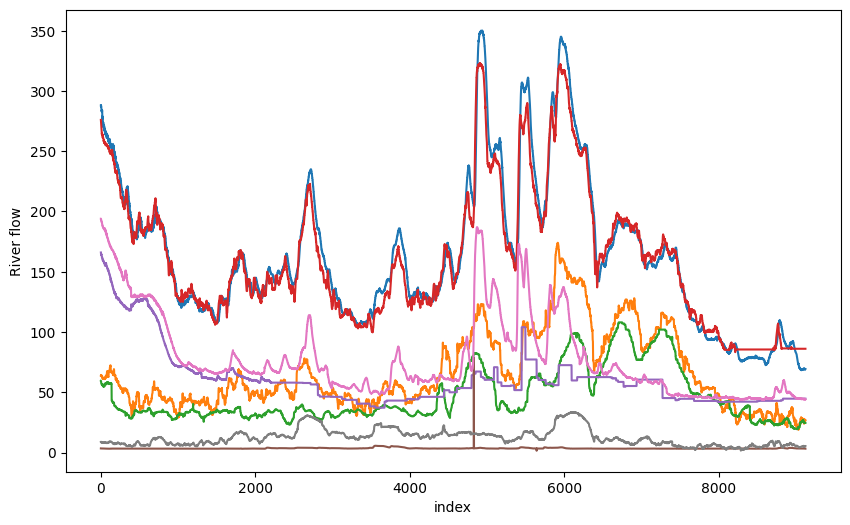

In [389]:
plt.figure(figsize=(10, 6))
plt.xlabel("index")
plt.ylabel("River flow")
for item in col1:
    plt.plot(df["id"], df[item])

plt.show()    

It can be seen that the dataset contains rivers both with the river flow index, which varies slightly, and with a strong change over time.

It can also be said that the two rivers have very similar plots of river flow index versus observation time. It is possible that the corresponding features for one of the rivers can be removed and its index can be predicted from the features of the second river.

In [390]:
# Consider the correlation of river flow indices for rivers, taking the correlation matrix for zero observation.
import os
from scipy.io import arff


def dt(path):
    df = arff.loadarff(path)
    df = pd.DataFrame(df[0])
    return df


d = 64
df = dt("Dataset/river_flow.arff")
df = df.dropna(axis=0)
X = (df.iloc[:, :d])
y = (df.iloc[:, d:])
y.head()

,CHSI2_48H__0,NASI2_48H__0,EADM7_48H__0,SCLM7_48H__0,CLKM7_48H__0,VALI2_48H__0,NAPM7_48H__0,DLDI4_48H__0
60,259.0,3.16,251.0,174.0,67.5,8.92,149.0,57.1
61,258.0,3.18,250.0,174.0,67.6,9.16,148.0,57.3
62,259.0,3.18,250.0,173.0,68.1,8.99,148.0,57.3
63,260.0,3.18,250.0,173.0,67.9,8.99,148.0,57.3
64,259.0,3.18,250.0,173.0,68.1,8.99,147.0,57.3


<AxesSubplot: >

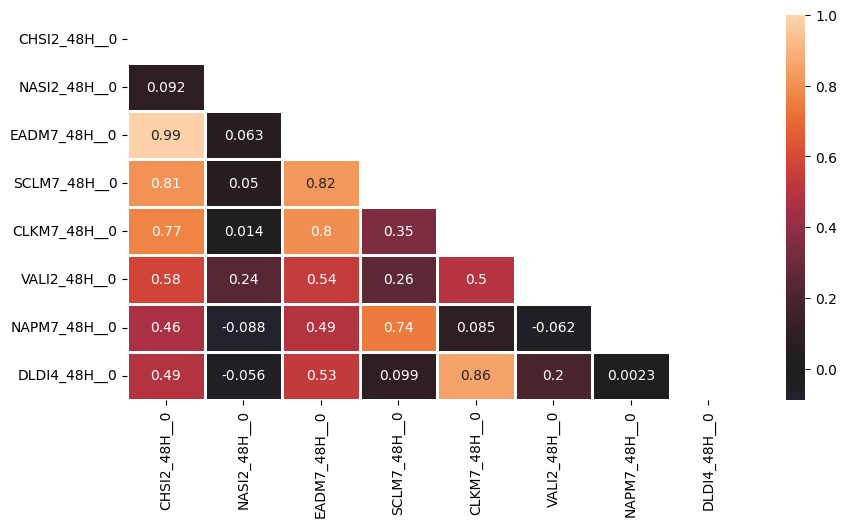

In [391]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
mask = np.triu(np.ones_like(y.corr(), dtype=bool))
sns.heatmap(y.corr(),
            annot=True,
            mask=mask,
            ax=ax,
            center=0,
            linewidths=1,
            vmax=1)

It can be seen from the matrix that the river flow indices for the two rivers are indeed very correlated with each other.
This means that when cleaning the data, it is possible to remove features corresponding to the EADM7 river.

### Data cleaning

In [392]:
# Remove features associated with the EADM7 river.
df = df.drop(columns={"EADM7__0", "EADM7__-6", "EADM7__-12", "EADM7__-24",
                      "EADM7__-36", "EADM7__-48", "EADM7__-60"})
df.shape

(9005, 65)

### Data partitioning and scaling

In [393]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (6753, 64)
Shape of X_test:  (2252, 64)
Shape of y_train:  (6753, 8)
Shape of y_test:  (2252, 8)


### Model training

In [ ]:
from numpy import absolute
from numpy import mean
from numpy import std
from sklearn.linear_model import Ridge
from sklearn.multioutput import MultiOutputRegressor, RegressorChain
from sklearn.model_selection import cross_validate
from sklearn.metrics import r2_score


steps = [
    ("scalar", StandardScaler()),
    ("model", Ridge(random_state=42))
]

pipe = Pipeline(steps)

alpha_grid = np.logspace(-100, 100, 20)
searcher = GridSearchCV(pipe, [{"model__alpha": alpha_grid}], scoring="r2", cv=5)
searcher.fit(X_train, y_train)

In [397]:
import time


mo_regr = MultiOutputRegressor(searcher)
start_mo_regr = time.time()
mo_regr.fit(X_train, y_train)
mo_regr_train_time_diff = time.time() - start_mo_regr

y_pred_train = mo_regr.predict(X_train)
mo_regr_accuracy_train = r2_score(y_train, y_pred_train)
print("r2 score Ridge model training and multioutput regression: ", mo_regr_accuracy_train)

y_pred = mo_regr.predict(X_test)
mo_regr_accuracy_test = r2_score(y_test, y_pred)
print("r2 score test Ridge model and multioutput regression: ", mo_regr_accuracy_test)

r2 score Ridge model training and multioutput regression:  0.8318809585423473
r2 score test Ridge model and multioutput regression:  0.757419292850752


In [398]:
regr_ch = RegressorChain(searcher).fit(X_train, y_train)
start_regr_ch = time.time()
regr_ch.fit(X_train, y_train)
regr_ch_train_time_diff = time.time() - start_regr_ch

y_pred_train = regr_ch.predict(X_train)
regr_ch_accuracy_train = r2_score(y_train, y_pred_train)
print("r2 score Ridge model training and multioutput regression: ", regr_ch_accuracy_train)

y_pred = regr_ch.predict(X_test)
regr_ch_accuracy_test = r2_score(y_test, y_pred)
print("r2 score test Ridge model and multioutput regression: ", regr_ch_accuracy_test)

r2 score Ridge model training and multioutput regression:  0.8319092321447996
r2 score test Ridge model and multioutput regression:  0.7595552730086752


### Compare models

In [399]:
models = [("Multioutput regressor", mo_regr_accuracy_train, mo_regr_accuracy_test, mo_regr_train_time_diff),
          ("Regressor chain", regr_ch_accuracy_train, regr_ch_accuracy_test, regr_ch_train_time_diff)
         ]

predict = pd.DataFrame(data=models, columns=["Model", "Training R2", "Test R2", "Training time"])
print(predict)

                   Model  Training R2   Test R2  Training time
0  Multioutput regressor     0.831881  0.757419      58.592263
1        Regressor chain     0.831909  0.759555      27.066392


- The Regressor Chain strategy showed a slightly higher value of the R2 metric than the Multioutput regressor
- In general, both models showed high accuracy
- Also Regressor Chain learned faster